In [1]:
import torch
import warnings
import pandas as pd
from util import *
from glob import glob
import matplotlib.pyplot as plt
from dataloader import NuclieData
from torch.utils.data import  DataLoader
from models.unet import UNet
from models.vgg11 import VGGSegmentation
from models.unet_opensource import UNet_kaggle
from easydict import EasyDict
warnings.filterwarnings("ignore")


In [2]:
args = EasyDict({
    "BATCH_SIZE": 32,
    "RANDOM_SEED": 42,
    "LEARNING_RATE": 0.001,
    "NUM_EPOCHS": 100, 
    "DEVICE": "cuda"
})


In [3]:
train_dataset = NuclieData(path='data/pp_train_imgs', transform=get_train_transform())
train_loader = DataLoader(train_dataset, batch_size=args["BATCH_SIZE"], shuffle=True, num_workers=2, drop_last=True)

valid_dataset = NuclieData(path='data/pp_valid_imgs', transform=get_valid_transform())
valid_loader = DataLoader(valid_dataset, batch_size=args["BATCH_SIZE"], shuffle=False, num_workers=2, drop_last=False)

## Train images

* https://www.kaggle.com/c/data-science-bowl-2018/data

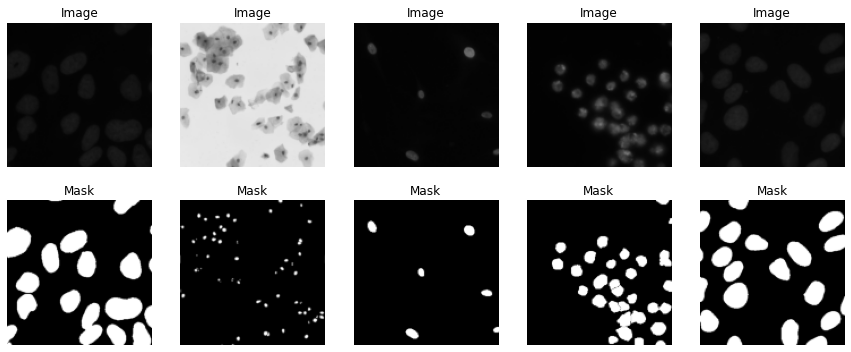

In [4]:
plot_img(5, train_loader, device=args["DEVICE"])

# Valid 데이터 예측 결과 시각화

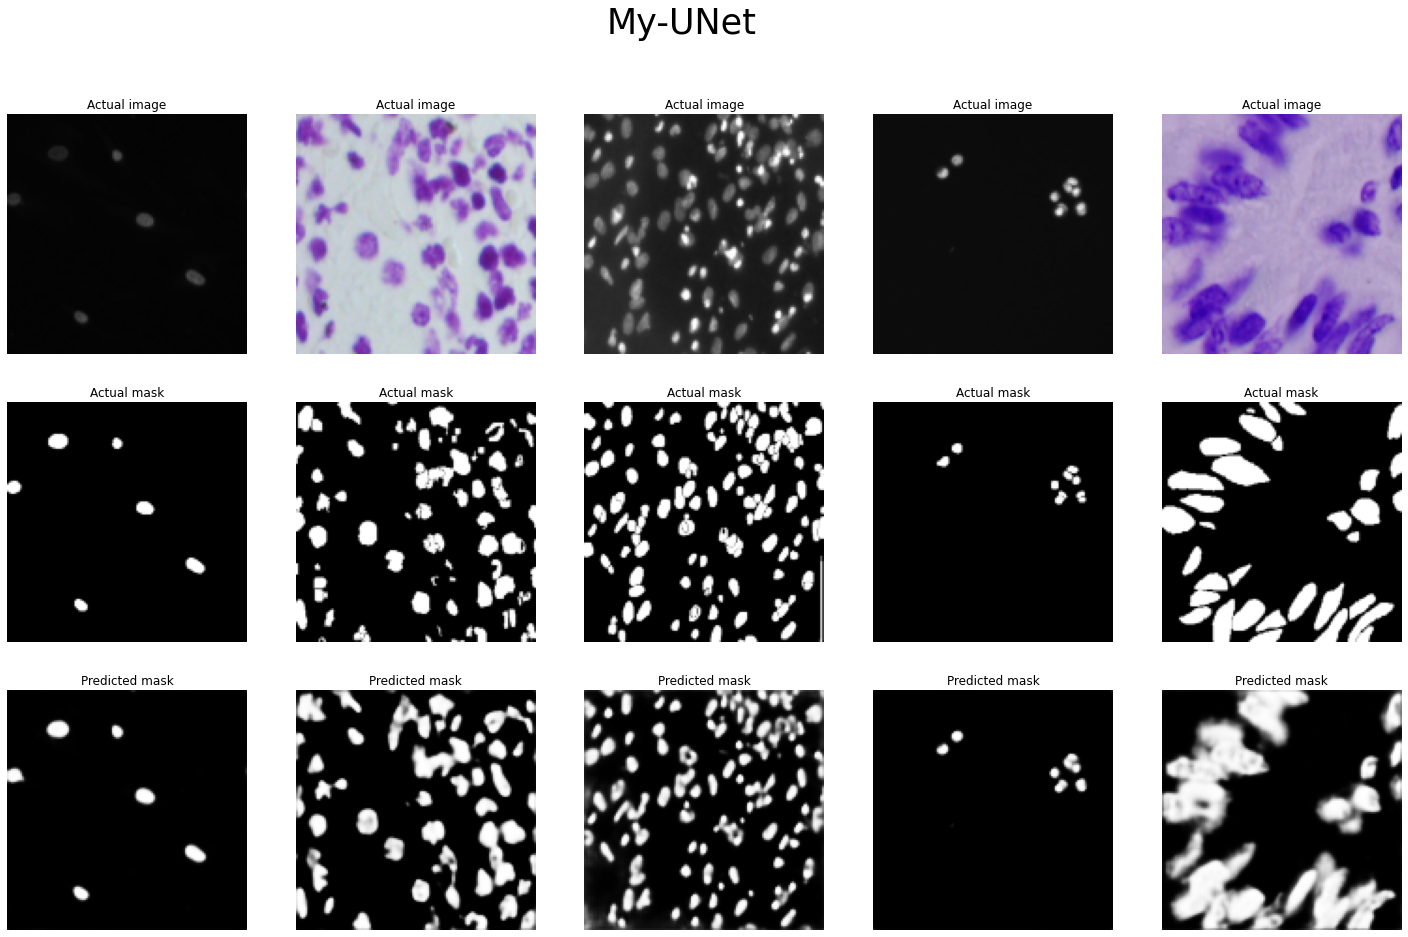

In [12]:
device = args["DEVICE"]
save_path = "/opt/ml/SEUNGHYUN_WORKSPACE/U-Net/result/my_unet_Epoch35_0.0872.tar"

checkpoint = torch.load(save_path)
model = UNet().to(device)
model.load_state_dict(checkpoint["state_dict"])
model.eval()

image,mask  = next(iter(valid_loader))

with torch.no_grad():
    image = image.to(device,dtype=torch.float)
    mask = mask.to(device,dtype=torch.float)
    y_pred = model(image)


plt.figure(figsize=(25,15))
plt.suptitle("My-UNet", fontsize=35)
for i in range(0,5):
    plt.subplot(3,5,i+1)
    plt.title('Actual image')
    plt.imshow(image_convert(image[i]))
    plt.axis("off")

for i in range(0,5):
    plt.subplot(3,5,i+5+1)
    plt.title('Actual mask')
    plt.imshow(mask_convert(mask[i]),cmap='gray')
    plt.axis("off")

for i in range(0,5):
    plt.subplot(3,5,i+10+1)
    plt.title('Predicted mask')
    plt.imshow(mask_convert(y_pred[i]),cmap='gray')
    plt.axis("off")

plt.show()
